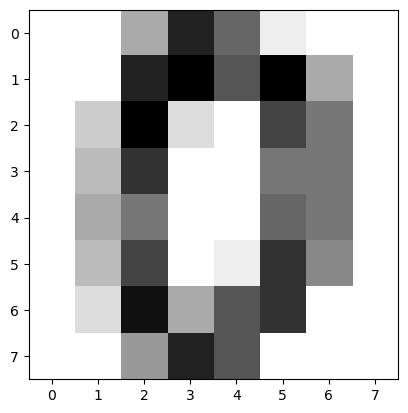

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import seaborn as sns
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
X_data = digits.images
y_data = digits.target

In [3]:
X_data.shape, y_data.shape

((1797, 8, 8), (1797,))

In [4]:
np.unique(y_data)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
X_data = X_data.reshape(X_data.shape[0], 8, 8, 1)
y_data = to_categorical(y_data, num_classes = 10)

In [6]:
X_data.shape, y_data.shape

((1797, 8, 8, 1), (1797, 10))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (1149, 8, 8, 1)
y train : (1149, 10)
X test : (360, 8, 8, 1)
y test : (360, 10)
X val : (288, 8, 8, 1)
y val : (288, 10)


In [10]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu',
                             padding='same', input_shape=(8,8,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',
                             padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [56]:
# rescaling 층 사용
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (8, 8, 1))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size = 3, activation='relu',
                             padding='same')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(32, kernel_size = 3, activation='relu',
                             padding='same')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               2

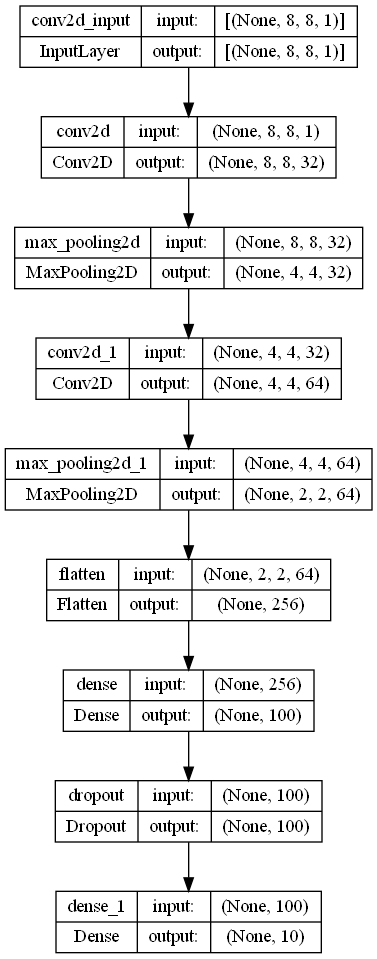

In [12]:
keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', 
              metrics='accuracy')

In [14]:
history = model.fit(X_train, y_train, epochs= 50, validation_data = (X_val,y_val))

Epoch 1/50
36/36 [==============================] - 2s 16ms/step - loss: 1.7844 - accuracy: 0.4395 - val_loss: 0.7612 - val_accuracy: 0.8854
Epoch 2/50
36/36 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.7946 - val_loss: 0.3929 - val_accuracy: 0.8993
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3662 - accuracy: 0.8973 - val_loss: 0.1778 - val_accuracy: 0.9479
Epoch 4/50
36/36 [==============================] - 0s 7ms/step - loss: 0.2431 - accuracy: 0.9295 - val_loss: 0.1170 - val_accuracy: 0.9688
Epoch 5/50
36/36 [==============================] - 0s 7ms/step - loss: 0.1726 - accuracy: 0.9426 - val_loss: 0.0918 - val_accuracy: 0.9722
Epoch 6/50
36/36 [==============================] - 0s 7ms/step - loss: 0.1185 - accuracy: 0.9713 - val_loss: 0.0768 - val_accuracy: 0.9792
Epoch 7/50
36/36 [==============================] - 0s 7ms/step - loss: 0.1243 - accuracy: 0.9687 - val_loss: 0.0833 - val_accuracy: 0.9792
Epoch 8/50
36/36 [=

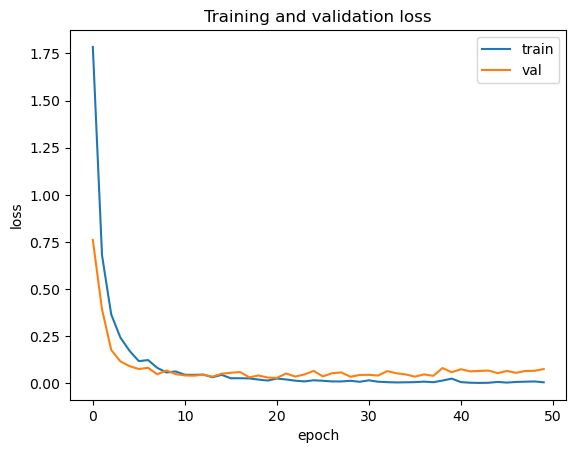

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend(['train','val'])
plt.show()

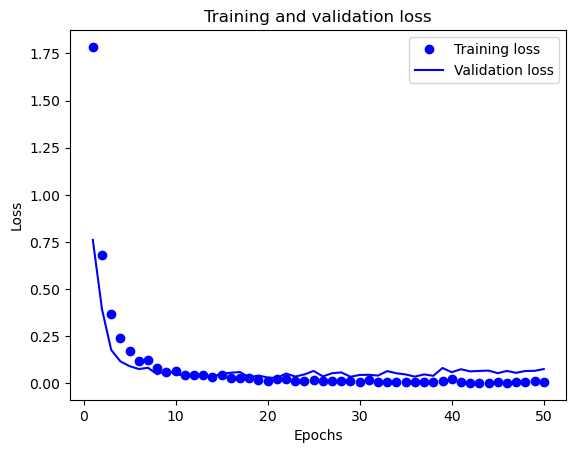

In [16]:
history_dict = history.history
acc = history_dict['accuracy']

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

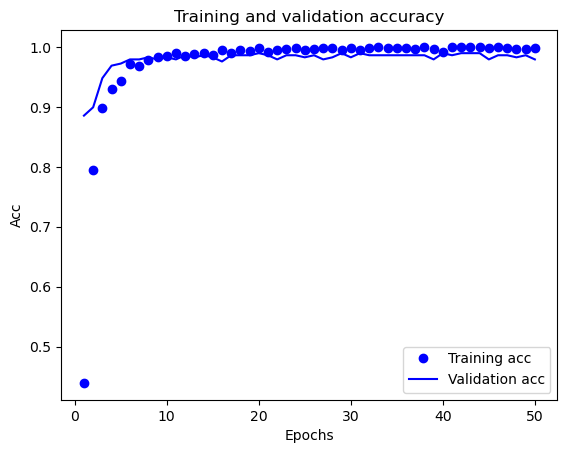

In [17]:
plt.clf() # 생성한 그래프를 clear
accuracy = history_dict['accuracy'] 
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc') 
plt.plot(epochs, val_accuracy, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [18]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9750


[0.0532466359436512, 0.9750000238418579]

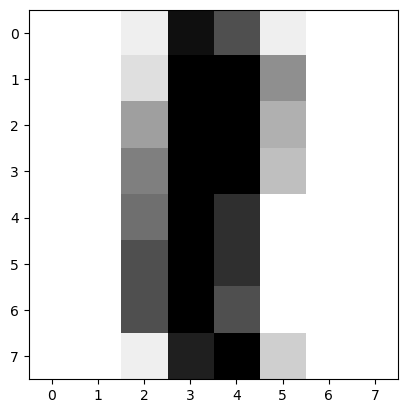

In [19]:
plt.imshow(X_test[0].reshape(8,8), cmap='gray_r')
plt.show()

In [20]:
preds = model.predict(X_test[0:1])
print(preds)

1/1 [==============================] - 0s 122ms/step
[[5.8875588e-13 1.0000000e+00 3.3488533e-08 4.5053163e-12 1.2034406e-11
  7.5435528e-14 8.1543226e-09 7.1952791e-11 1.2064180e-09 4.4367713e-12]]


In [55]:
print(np.argmax(preds))

1
